# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

This project can be treated as a supervised learning linear regression task. Price will serve as the dependent variable and vehicle characteristics will serve as independent variables. The process will involve exploratory data analysis, feature engineering, and model fitting to estimate the relationship between vehicle attributes and price. The goal is to identify the most influential predictors of price given feature importance to inform business decisions as to which consumers will value certian used cars.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn import set_config

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [4]:
data = pd.read_csv('data/vehicles.csv')

In [4]:
data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [5]:
data.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [7]:
print(f"Missing Data: \n{data.isna().sum()}")
print(f"\nDuplicate Data: {data.duplicated().sum()}")

Missing Data: 
id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

Duplicate Data: 0


In [8]:
# Helpful to understand all the different values that
# could be present for columns. Understanding these
# values helps in creating masks later on

print(f"Unique Data[region]: {data['region'].value_counts()}\n")
print(f"Unique Data[manufacturer]: {data['manufacturer'].value_counts()}\n")
print(f"Unique Data[model]: {data['model'].value_counts()}\n")
print(f"Unique Data[condition]: {data['condition'].value_counts()}\n")
print(f"Unique Data[cylinders]: {data['cylinders'].value_counts()}\n")
print(f"Unique Data[fuel]: {data['fuel'].value_counts()}\n")
print(f"Unique Data[title_status]: {data['title_status'].value_counts()}\n")
print(f"Unique Data[transmission]: {data['transmission'].value_counts()}\n")
print(f"Unique Data[drive]: {data['drive'].value_counts()}\n")
print(f"Unique Data[size]: {data['size'].value_counts()}\n")
print(f"Unique Data[type]: {data['type'].value_counts()}\n")
print(f"Unique Data[paint_color]: {data['paint_color'].value_counts()}\n")
print(f"Unique Data[state]: {data['state'].value_counts()}\n")

Unique Data[region]: region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: count, Length: 404, dtype: int64

Unique Data[manufacturer]: manufacturer
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda          

In [9]:
# Exploring some columns that might be intresting in what values
# that could be present

print(f"Min Data[price]: {data['price'].min()}")
print(f"Max Data[price]: {data['price'].max()}")
print(f"Min Data[odometer]: {data['odometer'].min()}")
print(f"Max Data[odometer]: {data['odometer'].max()}")
print(f"Min Data[year]: {data['year'].min()}")
print(f"Max Data[year]: {data['year'].max()}")

Min Data[price]: 0
Max Data[price]: 3736928711
Min Data[odometer]: 0.0
Max Data[odometer]: 10000000.0
Min Data[year]: 1900.0
Max Data[year]: 2022.0


### Some insights on data:
- region column is not helpful
- rows that should be removed:
  - title_status column with 'parts only'
  - vehicles priced over 450,000
  - odometer reading under 100 and over 300,000
  - vehicle types 'bus'
- vehicle types pickup and truck should be combined
- year values have .0 appended should be changed
- model values are very expansive not sure it would be useful
- dont see age of vehicle
- rename title_status to title and paint_color to color

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [5]:
# Cleaning some data 

# rename columns
data_clean = data.rename(columns={
    'title_status': 'title',
    'paint_color': 'color'
})

# remove rows that dont make sense or invalid
data_clean = data_clean[
    (data_clean['title'] != 'parts only') &            # remove 'parts only'
    (data_clean['price'] <= 450000) &                  # remove price > 450000
    (data_clean['odometer'].between(100, 300000)) &    # keep odometer between 100 and 300000
    (data_clean['type'] != 'bus')                      # remove buses
]

# combining column values for 'truck' and 'pickup'
data_clean['type'] = data_clean['type'].replace('pickup', 'truck')

# change year type
data_clean['year'] = data_clean['year'].fillna(0).astype(int)
data_clean['year'] = data_clean['year'].astype(int)

In [6]:
# change categorical columns to numeric

# cylinder column
mapping = {'3 cylinders': 3, 
           '4 cylinders': 4,
           '5 cylinders': 5, 
           '6 cylinders': 6, 
           '8 cylinders': 8, 
           '10 cylinders': 10,
           '12 cylinders': 12, 
           'other': 0 
          } 
data_clean['cylinders_num'] = data_clean['cylinders'].map(mapping)

In [7]:
# add new column for age of vehicle

from datetime import datetime

current_year = datetime.now().year

data_clean['age'] = current_year - data_clean['year'].astype('Int64')


In [8]:
# drop columns not needed

data_clean = data_clean.drop(['id', 'VIN'], axis=1)

In [9]:
data_clean.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title,transmission,drive,size,type,color,state,cylinders_num,age
27,auburn,33590,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,NaN,truck,white,al,8.0,12
28,auburn,22590,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,NaN,truck,blue,al,8.0,16
29,auburn,39590,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,NaN,truck,red,al,8.0,6
30,auburn,30990,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,NaN,truck,red,al,8.0,9
31,auburn,15000,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al,6.0,13


In [27]:
data_numeric = data_clean.select_dtypes(include='number')
data_numeric.head()

,price,year,odometer,age,cylinders_num
27,33590,2014,57923.0,12,8.0
28,22590,2010,71229.0,16,8.0
29,39590,2020,19160.0,6,8.0
30,30990,2017,41124.0,9,8.0
31,15000,2013,128000.0,13,6.0


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [10]:
X = data_clean.drop('price', axis=1) 
y = data_clean['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Linear regression on age

X_age = pd.get_dummies(data_clean[['age']])
y_age = data_clean['price']
X_age_train, X_age_test, y_age_train, y_age_test = train_test_split(X_age, y_age, test_size=0.2, random_state=42)

age_linreg = LinearRegression(fit_intercept=False).fit(X_age_train, y_age_train)
age_linreg_mse = mean_squared_error(age_linreg.predict(X_age_test), y_age_test)

print(age_linreg.coef_)
print(age_linreg_mse)

[39.39482766]
533591318.2210862


In [21]:
# Linear regression on manufacturer

X_man = pd.get_dummies(data_clean[['manufacturer']])
y_man = data_clean['price']
X_man_train, X_man_test, y_man_train, y_man_test = train_test_split(X_man, y_man, test_size=0.2, random_state=42)

man_linreg = LinearRegression(fit_intercept=False).fit(X_man_train, y_man_train)
man_linreg_mse = mean_squared_error(man_linreg.predict(X_man_test), y_man_test)

print(man_linreg.coef_)
print(man_linreg_mse)

[ 19897.140141    27972.83810888  48265.42105263  23724.10287042
  19171.19487444  14415.95222327  20040.70298903  18416.2369732
  10341.86658223  16527.80851064  14670.47357973 109049.56578947
  11984.69502408  19486.25933119  23256.34528768  12050.01694915
  10824.4848028   10765.75963212  19811.29450262  25763.62146149
  18178.05964983  11139.96022554   8360.22222222  19282.19807214
  19748.96008467  12564.3634439   19302.4041793    5504.56517094
  14275.54689146  13836.64516129  19150.          11924.56548216
   8144.97667962  31642.94639556  27175.99338866  27069.58158996
   5063.55382775  13070.20743405  38568.5832106   15906.51833051
  12922.23538355  17966.47615414]
231883560.58335894


In [28]:
# Linear regression on paint color

X_paint = pd.get_dummies(data_clean[['color']])
y_paint = data_clean['price']
X_paint_train, X_paint_test, y_paint_train, y_paint_test = train_test_split(X_paint, y_paint, test_size=0.2, random_state=42)

paint_linreg = LinearRegression(fit_intercept=False).fit(X_paint_train, y_paint_train)
paint_linreg_mse = mean_squared_error(paint_linreg.predict(X_paint_test), y_paint_test)

print(paint_linreg.coef_)
print(paint_linreg_mse)

[20494.1136178  16346.40072689 15234.92927157 15334.28347826
 12932.73577594 14749.41915793 18273.01436031 14796.55614973
 18467.94725552 15781.18996606 20958.86836259 19171.29780364]
310067213.27664346


In [12]:
# Linear regression on type and size

X_type = pd.get_dummies(data_clean[['type', 'size']])
y_type = data_clean['price']
X_type_train, X_type_test, y_type_train, y_type_test = train_test_split(X_type, y_type, test_size=0.2, random_state=42)

type_linreg = LinearRegression(fit_intercept=False).fit(X_type_train, y_type_train)
type_linreg_mse = mean_squared_error(type_linreg.predict(X_type_test), y_type_test)

print(type_linreg.coef_)
print(type_linreg_mse)

[18443.75583241 22349.94289905 24224.98497422 16393.63887164
 11888.10858047 18872.8919501  26469.99093181 15583.43590851
 27594.7165392  19451.87459877 15133.03590857 -6562.29095564
 -5251.92822863 -6448.09782382 -7121.07771572]
252653314.13255998


In [22]:
# Linear regression on condition, age, odometer

X_cond = pd.get_dummies(data_clean[['condition', 'age', 'odometer']])
y_cond = data_clean['price']
X_cond_train, X_cond_test, y_cond_train, y_cond_test = train_test_split(X_cond, y_cond, test_size=0.2, random_state=42)

condition_linreg = LinearRegression(fit_intercept=False).fit(X_cond_train, y_cond_train)
condition_linreg_mse = mean_squared_error(condition_linreg.predict(X_cond_test), y_cond_test)

print(condition_linreg.coef_)
print(condition_linreg_mse)

[ 2.12325393e+01  3.79333339e-02  1.00796947e+04 -2.72786287e+03
  1.74825863e+04  1.48879267e+04  1.94927093e+04 -1.79848356e+03]
342151047.3488877


In [16]:
# Linear regression on color and type

X_color = pd.get_dummies(data_clean[['type', 'color']])
y_color = data_clean['price']
X_color_train, X_color_test, y_color_train, y_color_test = train_test_split(X_color, y_color, test_size=0.2, random_state=42)

color_linreg = LinearRegression(fit_intercept=False).fit(X_color_train, y_color_train)
color_linreg_mse = mean_squared_error(color_linreg.predict(X_color_test), y_color_test)

print(color_linreg.coef_)
print(color_linreg_mse)

[11656.21124697 14852.45827988 16957.09495977  9815.35674865
  4903.34989758 10021.76739313 21143.65848027  8560.62372107
 20684.31225873 11501.89854437  9087.83228277  7860.32968112
  4552.85853642  2496.24006937  2914.95020055  1140.99145535
  3455.35668132  5782.58682557  3982.49191731  5325.66109082
  4094.90930529  7847.70610936  6414.7427186 ]
250135714.00990134


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

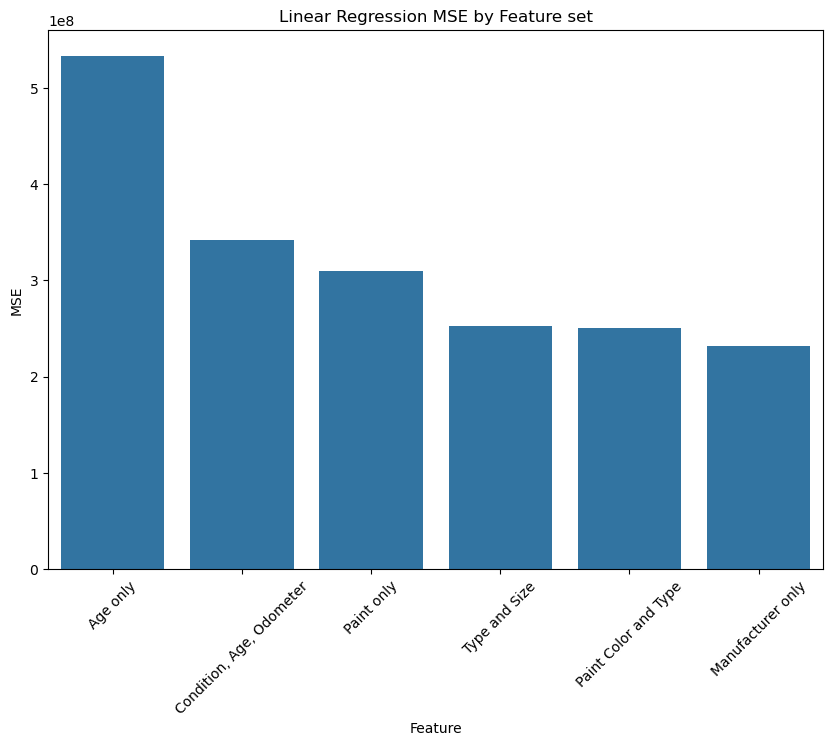

In [31]:
mse_df = pd.DataFrame({ 'Feature': ['Paint Color and Type', 
                                    'Condition, Age, Odometer', 
                                    'Type and Size',
                                    'Paint only',
                                    'Manufacturer only', 
                                    'Age only'], 
                        'MSE': [ color_linreg_mse,
                                 condition_linreg_mse, 
                                 type_linreg_mse, 
                                 paint_linreg_mse,
                                 man_linreg_mse, 
                                 age_linreg_mse ] 
                      }) 
mse_df = mse_df.sort_values(by='MSE', ascending=False)

plt.figure(figsize=(10, 7)) 
sns.barplot(data=mse_df, x='Feature', y='MSE') 
plt.title('Linear Regression MSE by Feature set') 
plt.xticks(rotation=45) 
plt.show()

### Review of the models
To understand which individual vehicle attributes most strongly influence used‑car prices, I trained a series of single‑feature and multi-feature linear regression models. Each model used price as the target and features as the predictor. The models were evaluated using Mean Squared Error (MSE), where lower MSE indicates a stronger predictor of price. Ploting the MSE results it seems Manufacturer of the vehicle produced the lowest MSE, making it the strongest single predictor of price. This makes sense as in the real‑world certain brands (e.g., Toyota, Honda, Lexus, BMW) consistently retain value better than others.

Other good predictors are Paint Color and Type of vehicle as well as Type and Size of vehicle.

### Going forward
These findings are the beginning and going back to dig into Manufacture data would be a next good step. Creating models to predict which Manufactures retain the most value.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

### Summary
Analysing more than 400,000 used‑car listings shows that manufacturer is the single strongest predictor of a vehicle’s resale price. When I trained a series of linear regression models—each using different feature sets to predict price, the model based solely on manufacturer outperformed all others by a good margin.

#### Why Manufacturers
Manufacturer feature captures several powerful factors that influence what buyers are willing to pay: Brand reputation, reliability, quality, and prestige.

#### Action
Focus on promoting and seeking premium brands which maintain stronger price valuation. 